In [38]:
import scipy as sp
import numpy as np
import scipy.interpolate as spint
import pandas as pd
import matplotlib.pyplot as plt
import time
import ast
import os
import re
solpath = "/home/shaunf/Documents/Computer/Code/projects/Massive_Vector_Field_Dynamical_Friction/ProcaAroundKerr/GWGenerator/Analytic_Flux/ProcaEnDenCSVData/";

In [39]:
aa=time.time()
files = os.listdir(solpath)
p = re.compile('Alpha_\d+_\d+')
t = [p.findall(f) for f in files]
p1 = re.compile('\d+')
numdoms= [list(map(float, p1.findall(te[0]))) for te in t]
alpha = np.array([i[0]/i[1] for i in numdoms])
tmp = np.abs(alpha-0.16)
indices = np.where(tmp==tmp.min())
ret=np.array(files)[indices]
sorting_index = [st[13:19]=='COORDS' for st in ret]
coordret = ret[sorting_index]
valueret = np.setdiff1d(ret, coordret)
time.time()-aa

0.002416849136352539

In [42]:
aa=time.time()
coordsdat = pd.read_csv(solpath+coordret[0], header=None, na_values="None")
valuesdat = pd.read_csv(solpath+valueret[0], header=None)
rdata = coordsdat[0].dropna()
thdata = coordsdat[1].dropna()
bb=time.time()
bb-aa

0.043144941329956055

In [80]:
coordsdat[1].dropna().values[-1]

3.110276727053896

In [44]:
aa = time.time()
interp = spint.RectBivariateSpline(rdata,thdata,valuesdat)
bb = time.time()
bb-aa

0.028636932373046875

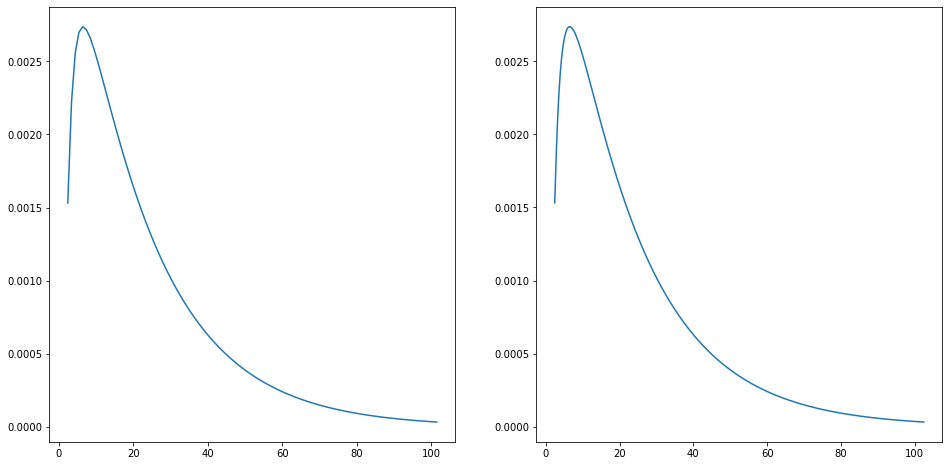

In [66]:
fig,ax = plt.subplots(1,2 ,figsize=(16,8))
rdat =rdata.values
thnum = thdata[5]
zdat =valuesdat[5].values

ax[0].plot(rdat[:100], zdat[:100])

newdom = np.arange(rdat[0], rdat[100], 1/100)
ax[1].plot(newdom, interp(newdom, thnum))

In [67]:
toten = lambda r: interp.integral(2,r,0.001,np.pi-0.001)
toten(10)/toten(rdat[-1])

In [68]:
toten(10)/toten(rdat[-1])

0.27326139171448893

In [73]:
aa = time.time()
files = os.listdir(solpath)
p = re.compile('Alpha_\d+_\d+')
t = [p.findall(f) for f in files]
p1 = re.compile('\d+')
numdoms= [list(map(float, p1.findall(te[0]))) for te in t]
alpha = np.array([i[0]/i[1] for i in numdoms])
tmp = np.abs(alpha-0.16)
indices = np.where(tmp==tmp.min())
ret=np.array(files)[indices]
sorting_index = [st[13:19]=='COORDS' for st in ret]
coordret = ret[sorting_index]
valueret = np.setdiff1d(ret, coordret)
coordsdat = pd.read_csv(solpath+coordret[0], header=None, na_values="None")
valuesdat = pd.read_csv(solpath+valueret[0], header=None)
rdata = coordsdat[0].dropna()
thdata = coordsdat[1].dropna()
interp = spint.RectBivariateSpline(rdata,thdata,valuesdat)
toten = lambda r: interp.integral(2,r,0.001,np.pi-0.001)
toten(10)/toten(rdat[-1])
bb=time.time()
bb-aa

0.05357527732849121